In [3]:
!pip install seaborn
!sudo apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following packages were automatically installed and are no longer required:
  ca-certificates-java cmake-data cuda-command-line-tools-11-3
  cuda-compiler-11-3 cuda-cudart-11-3 cuda-cudart-dev-11-3 cuda-cuobjdump-11-3
  cuda-cupti-11-3 cuda-cupti-dev-11-3 cuda-cuxxfilt-11-3
  cuda-documentation-11-3 cuda-driver-dev-11-3 cuda-gdb-11-3
  cuda-libraries-11-3 cuda-libraries-dev-11-3 cuda-memcheck-11-3
  cuda-nsight-11-3 cuda-nsight-compute-11-3 cuda-nsight-systems-11-3
  cuda-nvcc-11-3 cuda-nvdisasm-11-3 cuda-nvml-dev-11-3 cuda-nvprof-11-3
  cuda-nvprune-11-3 cuda-nvrtc-11-3 cuda-nvrtc-dev-11-3 cuda-nvtx-11-3
  cuda-nvvp-11-3 cuda-samples-11-3 cuda-sanitizer-11-3 cuda-thrust-11-3
  cuda-toolkit-11-3 cuda-toolkit-11-3-config-common
  cuda-toolkit-11-config-common cuda-toolkit-config-common cuda-tools-11-3
  cuda-visual-tools-11-3 default

In [21]:
import os
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

#오류 문구 제거
import warnings
warnings.filterwarnings(action='ignore')

from os.path import join as pjoin

In [22]:
def set_font():
    matplotlib.font_manager._rebuild()
    matplotlib.rcParams['font.family'] ='NanumGothic'
    matplotlib.rcParams['axes.unicode_minus'] =False

In [23]:
ROOT_PATH = os.path.abspath("..")

DATA = pjoin(ROOT_PATH, "data")
RAW_DATA = pjoin(DATA, "raw")
PROC_DATA = pjoin(DATA, "proc")

# 연평균 기온별 개체수 변화 - 시각화

In [24]:
data = pd.read_csv(pjoin(PROC_DATA, '연평균 기온별 1차소비자 개체수.csv'))
data.rename(columns={'연 평균기온' : 'Average annual temperature'}, inplace=True)
data

,분류명,조사연도,Average annual temperature,개체수
0,각다귀과,2017,2017 - 12.6,24
1,각다귀과,2018,2018 - 12.7,20
2,각다귀과,2020,2020 - 12.9,24
3,각다귀과,2019,2019 - 13.2,14
4,각다귀과,2015,2015 - 13.5,36
...,...,...,...,...
199,플라나리아과,2018,2018 - 12.7,18
200,플라나리아과,2020,2020 - 12.9,250
201,플라나리아과,2019,2019 - 13.2,55
202,플라나리아과,2015,2015 - 13.5,16


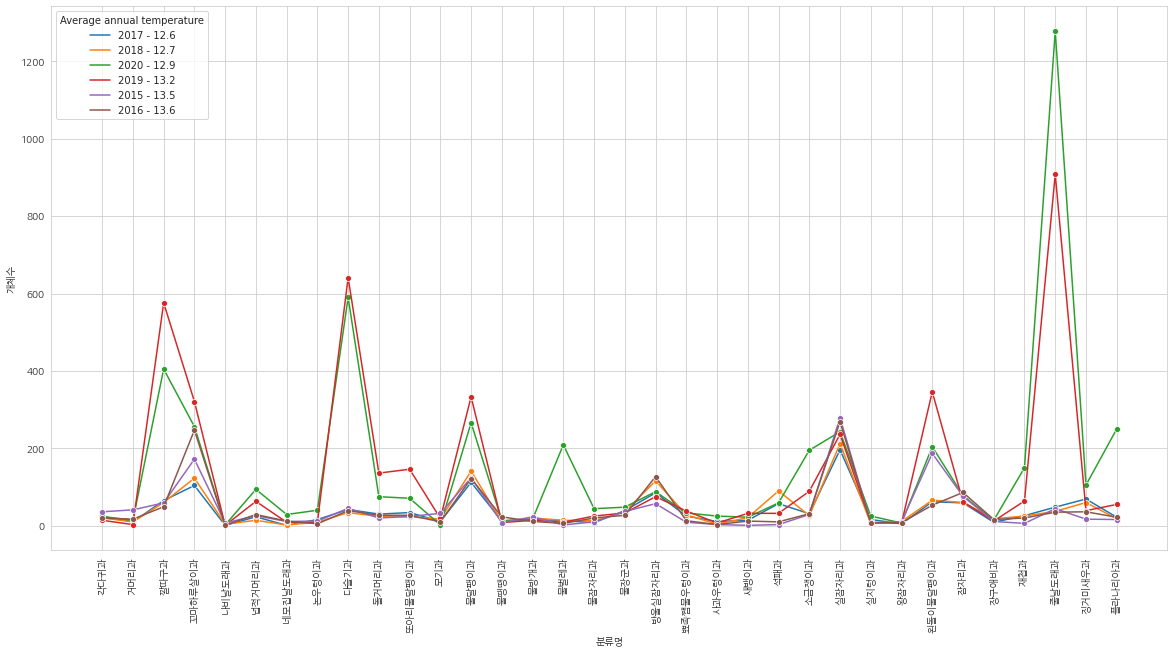

In [25]:
set_font()

fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

sns.set_style("whitegrid")
sns.lineplot(x='분류명', y='개체수', data=data, hue="Average annual temperature",marker = 'o')
plt.show()

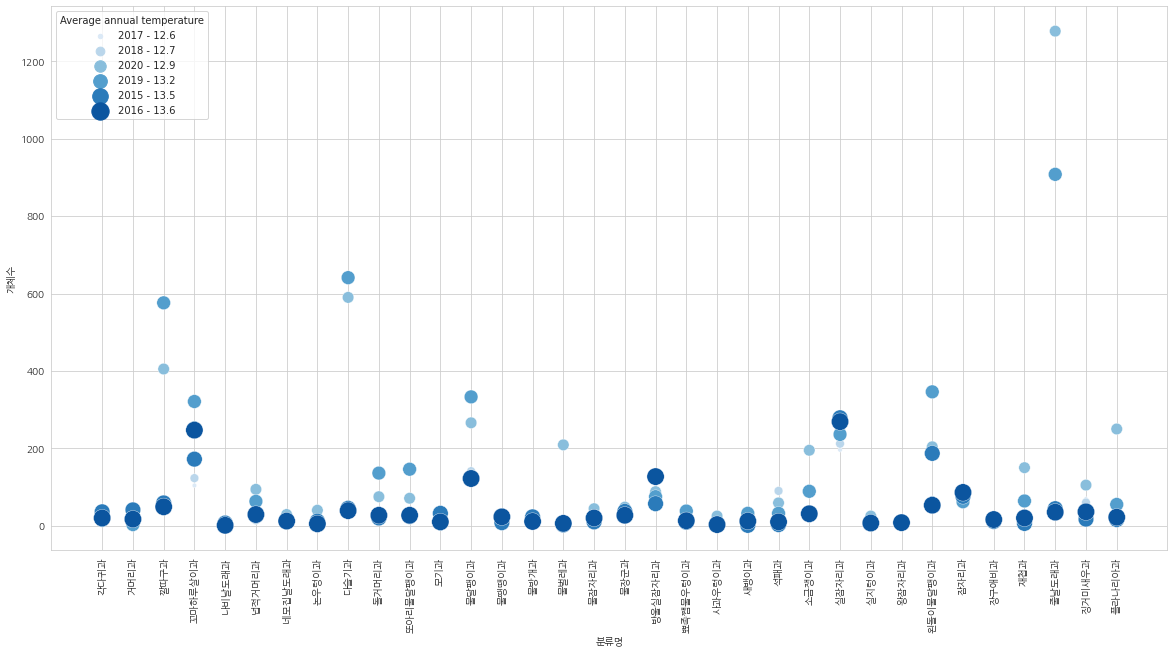

In [26]:
set_font()

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

sns.set_style('whitegrid')
sns.scatterplot(x='분류명', y='개체수', data=data, hue="Average annual temperature", palette="Blues", size='Average annual temperature', sizes = (300,20))
plt.show()

# 개체수별 상관분석

In [27]:
df = pd.read_csv(pjoin(PROC_DATA, '연평균 비교.csv'))
df

,연도,각다귀과,거머리과,깔따구과,꼬마하루살이과,나비날도래과,넙적거머리과,네모집날도래과,논우렁이과,다슬기과,...,5_9평균,5_9최고기온,5_9최저기온,연평균 CO2 대기농도,연평균 메탄 대기농도,연평균 아산화질소 대기농도,연평균 염화불화탄소11 대기농도,연평균 염화불화탄소12 대기농도,연평균 염화불화탄소113 대기농도,연평균 육불화황 대기농도
0,2015,36,41,59,172,7,26,11,12,45,...,23.02,33.30,13.80,407.0,1952,329.0,233.60,520.70,71.8,9.3
1,2016,20,17,49,247,1,29,12,5,39,...,23.74,33.08,14.68,409.9,1965,330.0,239.40,529.80,72.6,9.5
2,2017,24,10,65,104,1,23,1,16,42,...,26.20,33.20,13.24,412.2,1970,331.4,230.90,510.20,71.2,9.6
3,2018,20,10,60,123,4,14,2,9,34,...,23.50,34.06,13.52,415.2,1974,332.9,228.30,502.70,70.1,9.8
4,2019,14,3,576,321,1,63,9,9,641,...,23.08,33.46,13.32,417.9,1985,334.2,231.24,512.04,70.9,10.1
5,2020,24,14,405,256,2,94,29,40,590,...,22.44,32.26,14.68,420.4,1998,335.0,224.00,496.80,68.9,10.5


## 개체수 - 기온관련

In [28]:
df.columns

Index(['연도', '각다귀과', '거머리과', '깔따구과', '꼬마하루살이과', '나비날도래과', '넙적거머리과', '네모집날도래과',
       '논우렁이과', '다슬기과', '돌거머리과', '또아리물달팽이과', '모기과', '물달팽이과', '물땡땡이과', '물방개과',
       '물벌레과', '물잠자리과', '물장군과', '방울실잠자리과', '뾰족쨈물우렁이과', '사과우렁이과', '새뱅이과', '석패과',
       '소금쟁이과', '실잠자리과', '실지렁이과', '왕잠자리과', '왼돌이물달팽이과', '잠자리과', '장구애비과', '재첩과',
       '줄날도래과', '징거미새우과', '플라나리아과', '평균기온', '최저기온', '최고기온', '평균최저기온', '평균최고기온',
       '합계 강수량(mm)', '5_9평균', '5_9최고기온', '5_9최저기온', '연평균 CO2 대기농도',
       '연평균 메탄 대기농도', '연평균 아산화질소 대기농도', '연평균 염화불화탄소11 대기농도',
       '연평균 염화불화탄소12 대기농도', '연평균 염화불화탄소113 대기농도', '연평균 육불화황 대기농도'],
      dtype='object')

In [29]:
scores_names = ['평균기온', '최저기온', '최고기온', '평균최저기온', '평균최고기온',
       '합계 강수량(mm)', '5_9평균', '5_9최고기온', '5_9최저기온', '연평균 CO2 대기농도',
       '연평균 메탄 대기농도', '연평균 아산화질소 대기농도', '연평균 염화불화탄소11 대기농도',
       '연평균 염화불화탄소12 대기농도', '연평균 염화불화탄소113 대기농도', '연평균 육불화황 대기농도']

In [30]:
# 상관 계수가 |0.5| 이상, p-value값이 0.05 이하 개체명만 출력
coe_level = 0.5
pval_level = 0.05

In [31]:
tgt_names = list(filter(lambda x: not x in scores_names + ['연도'], df.columns))
print(tgt_names[:2] + tgt_names[-2:])

['각다귀과', '거머리과', '징거미새우과', '플라나리아과']


In [32]:
def print_correlation(tgt_names, x):
    for name in tgt_names:
        coe, pval = spst.pearsonr(df[name], df[x])
        if abs(coe) >= 0.5 and pval <= 0.05:
            print(f'{name}: %.2f (pvalue %.3f)' % (coe, pval))

In [33]:
print_correlation(tgt_names, '평균기온')

석패과: -0.91 (pvalue 0.012)
실잠자리과: 0.93 (pvalue 0.006)


In [34]:
print_correlation(tgt_names, '최저기온')

방울실잠자리과: -0.91 (pvalue 0.013)
왼돌이물달팽이과: 0.85 (pvalue 0.032)


In [35]:
print_correlation(tgt_names, '최고기온')

In [36]:
print_correlation(tgt_names, '평균최고기온')

논우렁이과: -0.82 (pvalue 0.047)
물장군과: -0.87 (pvalue 0.025)
사과우렁이과: -0.86 (pvalue 0.030)
실지렁이과: -0.85 (pvalue 0.034)
징거미새우과: -0.95 (pvalue 0.004)


In [37]:
print_correlation(tgt_names, '평균최저기온')

실잠자리과: 0.96 (pvalue 0.002)
잠자리과: 0.95 (pvalue 0.004)


In [18]:
# 5 ~ 9월의 평균기온
print_correlation(tgt_names, '5_9평균')

In [19]:
# 5 ~ 9월의 최고기온
print_correlation(tgt_names, '5_9최고기온')

네모집날도래과: -0.86 (pvalue 0.030)
실지렁이과: -0.82 (pvalue 0.044)


In [20]:
# 5 ~ 9월의 최저기온
print_correlation(tgt_names, '5_9최저기온')

잠자리과: 0.91 (pvalue 0.011)
